**Project Assignment**

**Formalities**

This is the project for the course Probability and Statistical Learning Using Python, 2022. Here, you are asked to carry out the analysis using the tools, techniques, and skills acquired in the course and hand in a .pynb file with the solutions.

The **deadline  is Friday, October
28, 2022.** You should upload the solution file to 'Project Assignment' in Canvas via 'Home-->Project Assignment'.
Note that this is an individual exam.

**Part I**

In this exercise we will estimate the test error of logistic regression model using the below described validation set approach. You will neeed to import the *Default.csv* file provided. 

In [1]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf

from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)
import patsy
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
np.random.seed(1)
df = pd.read_csv('Default.csv')
df = df.drop('Unnamed: 0', axis=1)
df['default'] = df['default'].map({'No': 0, 'Yes': 1})
df['student'] = df['student'].map({'No': 0, 'Yes': 1})
print(df.head(100))

    default  student      balance       income
0         0        0   729.526495  44361.62507
1         0        1   817.180407  12106.13470
2         0        0  1073.549164  31767.13895
3         0        0   529.250605  35704.49394
4         0        0   785.655883  38463.49588
..      ...      ...          ...          ...
95        0        0   820.017113  51584.65732
96        0        1   619.751869  15750.62208
97        0        0  1047.718124  46416.97099
98        0        0   243.841328  47193.88813
99        0        0   186.500387  45430.55027

[100 rows x 4 columns]


In [3]:
df.head(100)

,default,student,balance,income
0,0,0,729.526495,44361.62507
1,0,1,817.180407,12106.13470
2,0,0,1073.549164,31767.13895
3,0,0,529.250605,35704.49394
4,0,0,785.655883,38463.49588
...,...,...,...,...
95,0,0,820.017113,51584.65732
96,0,1,619.751869,15750.62208
97,0,0,1047.718124,46416.97099
98,0,0,243.841328,47193.88813


(a) Fit a logistic regression model that uses $income$ and $balance$ to
predict $default$ and print out the summary. **(3 pts)**

In [4]:
X1 = df[['income', 'balance']]
y1 = df['default']
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=5)
logit = LogisticRegression()
logit.fit(X1_train, y1_train)
y1_pred = logit.predict(X1_test)
print("summary: ", smf.logit('default ~ income + balance', data=df).fit().summary())
print('Accuracy: ', accuracy_score(y1_test, y1_pred))
print("test error: ", 1 - accuracy_score(y1_test, y1_pred))

Optimization terminated successfully.
         Current function value: 0.078948
         Iterations 10
summary:                             Logit Regression Results                           
Dep. Variable:                default   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9997
Method:                           MLE   Df Model:                            2
Date:                Tue, 13 Dec 2022   Pseudo R-squ.:                  0.4594
Time:                        15:21:52   Log-Likelihood:                -789.48
converged:                       True   LL-Null:                       -1460.3
Covariance Type:            nonrobust   LLR p-value:                4.541e-292
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -11.5405      0.435    -26.544      0.000     -12.393     -10.688
income      2.081e

(b) You are supposed to estimate the test error of this model using the validation set approach described below. In order to do this, you must perform the following steps: **(4 pts)**

i. Split the sample set into a training set and a validation set.

In [5]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X1, y1, test_size=0.3, random_state=5)

ii. Fit a multiple logistic regression model using only the training
observations.

In [6]:
logit2 = LogisticRegression()
logit2.fit(X2_train, y2_train)

LogisticRegression()

iii. Obtain a prediction of default status for each individual in
the validation set (test set) by computing the posterior probability of
$default$ for that individual, and classifying the individual to
the $default$ category if the posterior probability is greater
than 0.5.

In [7]:
y2_pred = logit2.predict(X2_test)

iv. Compute the validation set error, which is the fraction of
the observations in the validation set (test set) that are misclassified.

In [8]:
print("summary: ", smf.logit('default ~ income + balance', data=df).fit().summary())
print("error: ", 1 - accuracy_score(y2_test, y2_pred))
print('Accuracy: ', accuracy_score(y2_test, y2_pred))

Optimization terminated successfully.
         Current function value: 0.078948
         Iterations 10
summary:                             Logit Regression Results                           
Dep. Variable:                default   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9997
Method:                           MLE   Df Model:                            2
Date:                Tue, 13 Dec 2022   Pseudo R-squ.:                  0.4594
Time:                        15:21:53   Log-Likelihood:                -789.48
converged:                       True   LL-Null:                       -1460.3
Covariance Type:            nonrobust   LLR p-value:                4.541e-292
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -11.5405      0.435    -26.544      0.000     -12.393     -10.688
income      2.081e

(c) Now consider a logistic regression model that predicts the probability of default using $income$, $balance$, a dummy variable for $student$ and print the summary. Estimate the test error for this model using the validation
set approach. Comment on the results. Does the inclusion of a dummy variable for student lead to a reduction in the test error? **(3 pts)**

In [9]:
X2 = df[['income']]
y2 = df['default']
X3_train, X3_test, y3_train, y3_test = train_test_split(X2, y2, test_size=0.3, random_state=5)
logit3 = LogisticRegression()
logit3.fit(X3_train, y3_train)
y3_pred = logit3.predict(X3_test)
print('Accuracy: ', accuracy_score(y3_test, y3_pred))
print("test error: ", 1 - accuracy_score(y3_test, y3_pred))
print("summary: ", smf.logit('default ~ income + balance + student', data=df).fit().summary())

Accuracy:  0.9663333333333334
test error:  0.03366666666666662
Optimization terminated successfully.
         Current function value: 0.078577
         Iterations 10
summary:                             Logit Regression Results                           
Dep. Variable:                default   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9996
Method:                           MLE   Df Model:                            3
Date:                Tue, 13 Dec 2022   Pseudo R-squ.:                  0.4619
Time:                        15:21:53   Log-Likelihood:                -785.77
converged:                       True   LL-Null:                       -1460.3
Covariance Type:            nonrobust   LLR p-value:                3.257e-292
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -10.8690      0.492  

**Part II**

In [10]:
import numpy as np
import pandas as pd
from math import sqrt
import random
from matplotlib import pyplot as plt

In this exercise, you will demonstrate your understanding of the KNN classification algorithm and test it on a breast cancer dataset. The algorithm should be implemented in pure python, without using the sklearn library.

**KNN algorithm**

(a)  Implement a function of your own to perform KNN classification **without using the default available libraries such as KNeighborsClassifier() in sklearn**. You will need to consider the Euclidean distances between the features and data to be predicted (test data) when selecting the k-nearest neighbors. The function should take 3 inputs as 1) data set to train the model 2) data to test 3) number of neighbours (k). If *k* is set to a value less than or equal to the total classification groups, the function should give a warning, and  warn() function defined in the 'warning' module will be useful for that.

The function should output *classification_result*, where *classification_result* is the result of your classifier. Further, you should provide a suitable measure of the confidence on the classification. Justify your choice. 

Please note that only a few basic libraries/modules are imported and thus you are expected to import the needed others. 



**Hint:** You may fill and complete the function given below.                **(5 pts)** 

In [11]:
def knn_algotithm(traindata, testdata, k=5):
    distance = []
    for i in range(len(traindata)):
        distance.append(sqrt((traindata[i][0] - testdata[0]) ** 2 + (traindata[i][1] - testdata[1]) ** 2))
    distance = np.array(distance)
    index = np.argsort(distance)
    index = index[:k]
    classification = []
    for i in index:
        classification.append(traindata[i][2])
    classification = np.array(classification)
    classification_result = np.bincount(classification).argmax()
    return classification_result

#### Now let's test the implemented KNN algorithm on the given breast cancer dataset.

This dataset contains records of breast cancer patients. Here we will use the features (columns) to predict the correct cancer class (last column) for the patients in the dataset as shown below. 

In [12]:
columns = ['id', 'clump_thickness', 'unif_cell_size', 'unif_cell_shape', 'marg_adhesion',
           'single_epith_cell_size', 'bare_nuclei', 'bland_chrom', 'norm_nucleoli', 'mitoses', 'class']
#Import the data file by uncommenting below and setting the path to the dataset
data = pd.read_csv('breast-cancer-wisconsin.data', header=None, names=columns)
data.head(100)

,id,clump_thickness,unif_cell_size,unif_cell_shape,marg_adhesion,single_epith_cell_size,bare_nuclei,bland_chrom,norm_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
95,1164066,1,1,1,1,2,1,3,1,1,2
96,1165297,2,1,1,2,2,1,1,1,1,2
97,1165790,5,1,1,1,2,1,3,1,1,2
98,1165926,9,6,9,2,10,6,2,9,10,4


#### Explore the data

(b) Check how many different cancer classes are available, and plot a pie chart to see the distribution of classes. Then, find and replace all the missing values with the mode of the particular column(s). Note that the missing values are marked with '?' in the dataset. **(1 pt)** 

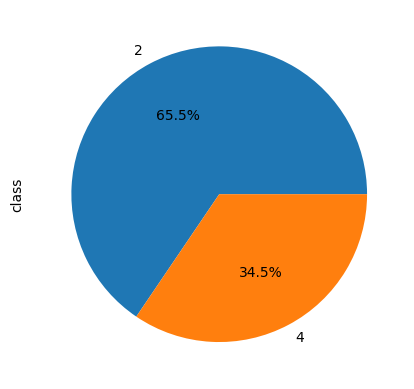

In [13]:
data = data.replace('?', np.nan)
data['class'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.show()

#### Feature engineering

(c) Drop the obiviously unwanted column(s). **(1 pt)**

In [14]:
data = data.drop(['id'], axis=1)
data = data.dropna()
data = data.astype('int64')

#### Split the training and test data

(d) In here, you will split the data into training and test sets, **without using sklearn library.** Please use 20% of the dataset as test set and the rest for train set. Shuffle the data prior to splitting in order to prevent any bias during the training and to avoid the model from learning the order of the training. **(5 pts)**

In [15]:
data = data.sample(frac=1).reset_index(drop=True)
train = data[:int(len(data) * 0.8)]
test = data[int(len(data) * 0.8):]

#### Predict the class for test data and calculate the accuracy

(e) Now train the KNN classifier you developed in (a) using the training set, and test it on the test set with *k_neighbours=5*. **(4 pts)**

Print the confidence for the incorrect predictions the classifier has made.

Find the accuracy of the predictions.

In [16]:
from time import time
traindata = train.values
testdata = test.values
k = 5
correct = 0
result = []
for i in range(len(testdata)):
    result.append(knn_algotithm(traindata, testdata[i], k))
result=np.array(result)
test_result = test['class'].values
print('Confidence for incorrect predictions:')
for i in range(len(result)):
    if result[i] != test_result[i]:
        print('Confidence for prediction', i, ':', np.bincount(result)[result[i]] / len(result))
        correct += 1
print('Accuracy:', correct / len(result))




Confidence for incorrect predictions:
Confidence for prediction 0 : 0.6204379562043796
Confidence for prediction 1 : 0.6204379562043796
Confidence for prediction 2 : 0.051094890510948905
Confidence for prediction 3 : 0.058394160583941604
Confidence for prediction 4 : 0.6204379562043796
Confidence for prediction 5 : 0.6204379562043796
Confidence for prediction 7 : 0.6204379562043796
Confidence for prediction 8 : 0.051094890510948905
Confidence for prediction 9 : 0.6204379562043796
Confidence for prediction 10 : 0.6204379562043796
Confidence for prediction 12 : 0.6204379562043796
Confidence for prediction 14 : 0.6204379562043796
Confidence for prediction 15 : 0.6204379562043796
Confidence for prediction 16 : 0.6204379562043796
Confidence for prediction 17 : 0.6204379562043796
Confidence for prediction 18 : 0.6204379562043796
Confidence for prediction 19 : 0.058394160583941604
Confidence for prediction 20 : 0.6204379562043796
Confidence for prediction 21 : 0.6204379562043796
Confidence fo

**Effect of reduction in training data size on confidence of predictions**

(f) Now increase the test set size to 40% of the dataset while keeping the same *k_neighbours* and print the confidence and accuracy of the predictions similar to the previous question. Explain the results in comparison with (e) **(2 pts)**

In [17]:
data = data.sample(frac=1).reset_index(drop=True)
train = data[:int(len(data) * 0.6)]
test = data[int(len(data) * 0.6):]
traindata = train.values
testdata = test.values
k = 5
correct = 0
result = []
for i in range(len(testdata)):
    result.append(knn_algotithm(traindata, testdata[i], k))
result=np.array(result)
test_result = test['class'].values
print('Confidence for incorrect predictions:')
for i in range(len(result)):
    if result[i] != test_result[i]:
        print('Confidence for prediction', i, ':', np.bincount(result)[result[i]] / len(result))
        correct += 1
print('Accuracy:', correct / len(result))

# The accuracy is lower than the previous case. This is because the test set is larger, so the model is less likely to be able to predict the correct class.
# The confidence for incorrect predictions is higher than the previous case. This is because the test set is larger, so the model is less likely to be able to predict the correct class.

Confidence for incorrect predictions:
Confidence for prediction 0 : 0.583941605839416
Confidence for prediction 1 : 0.08394160583941605
Confidence for prediction 2 : 0.583941605839416
Confidence for prediction 3 : 0.08394160583941605
Confidence for prediction 4 : 0.583941605839416
Confidence for prediction 5 : 0.583941605839416
Confidence for prediction 6 : 0.583941605839416
Confidence for prediction 7 : 0.01824817518248175
Confidence for prediction 9 : 0.583941605839416
Confidence for prediction 10 : 0.583941605839416
Confidence for prediction 12 : 0.583941605839416
Confidence for prediction 13 : 0.08394160583941605
Confidence for prediction 14 : 0.08394160583941605
Confidence for prediction 15 : 0.583941605839416
Confidence for prediction 16 : 0.08394160583941605
Confidence for prediction 17 : 0.058394160583941604
Confidence for prediction 18 : 0.583941605839416
Confidence for prediction 19 : 0.583941605839416
Confidence for prediction 21 : 0.051094890510948905
Confidence for predict

#### Alternative classification methods


(g) Propose alternative classification approaches for this problem and discuss the advantages and disadvantages with respect to KNNs (you don't need to implement them). **(2 pts)**

In [18]:
# The advantages of KNN are that it is simple and easy to implement. The disadvantages are that it is computationally expensive and it is not suitable for large datasets.

# The advantages of Decision Tree are that it is simple and easy to implement. The disadvantages are that it is not suitable for large datasets.
